In [97]:
#importing neccessary modules
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

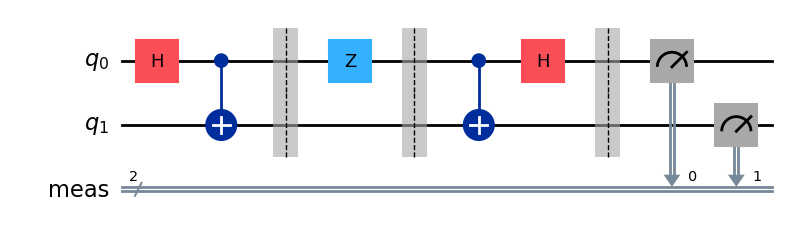

In [31]:
#specify the bits to be transmitted
c = "0"
d = "1"

#creating Two Quantum Bits Circuit
qc = QuantumCircuit(2)

# Prepare ebit used for superdense coding
qc.h(0)
qc.cx(0, 1)
qc.barrier()

# Alice's operations
if c == "1":
    qc.x(0)
if d == "1":
    qc.z(0)
qc.barrier()

# Bob's actions
qc.cx(0, 1)
qc.h(0)

#measure it
qc.measure_all()

#draw the circuit
qc.draw(output='mpl', style= 'iqp')

{'01': 1024}


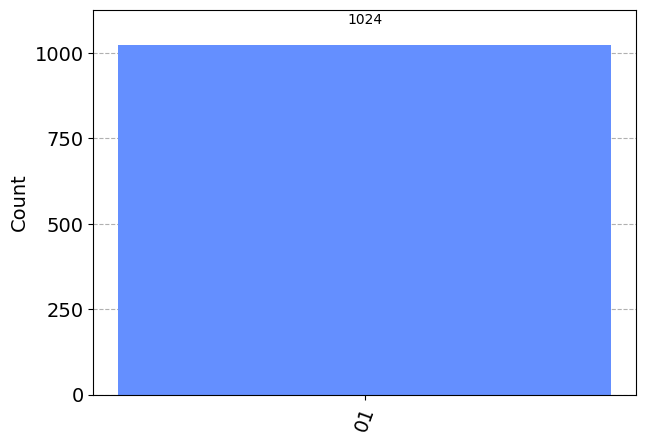

In [32]:
# Specify the backend (the simulator)
simulator = BasicSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the compiled circuit
job = simulator.run(compiled_circuit)

# Get the result
result = job.result()

# Print the counts
print(result.get_counts())

# Plot the histogram
plot_histogram(result.get_counts())

In [242]:
import numpy as np

#specify the bits to be transmitted
c = "1"
d = "1"

# Define the basic quantum gates as matrices
I = np.array([[1, 0], [0, 1]], dtype=complex)  # Identity
X = np.array([[0, 1], [1, 0]], dtype=complex)  # Pauli-X
Z = np.array([[1, 0], [0, -1]], dtype=complex) # Pauli-Z
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)   # Hadamard
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]], dtype=complex) # CNOT gate

# Initialize the quantum state |00⟩
state = np.array([1, 0, 0, 0], dtype=complex)  # |00⟩

# Prepare ebit used for superdense coding
# Apply H on the first qubit
state = np.kron(H, I) @ state

print("Pre-entangled state vector:", state)  

# Apply CNOT with the first qubit as control and second as target
state = CNOT @ state

print("Pre-encoding state vector:", state)   

# Alice's operations
if c == "1":
    state = np.kron(X, I) @ state  # Apply X on the first qubit
if d == "1":
    state = np.kron(Z, I) @ state  # Apply Z on the first qubit
    
print("Post-encoding state vector:", state)    

# Bob's actions
state = CNOT @ state  # Apply CNOT with the first qubit as control and second as target
state = np.kron(H, I) @ state  # Apply H on the first qubit

# Measure the state (probabilities)
probabilities = np.abs(state)**2

# Output the final state and measurement probabilities
print("Final state vector:", state)
print("Measurement probabilities:", probabilities)

# Map the index to (c, d) bits
mapping = [
    ("0", "0"),  # |Φ+⟩
    ("0", "1"),  # |Φ-⟩
    ("1", "0"),  # |Ψ+⟩
    ("1", "1")   # |Ψ-⟩
]
    
# Find the index of the maximum probability
max_index = np.argmax(probabilities)
    
print(mapping[max_index])

# Interpret the results
i = mapping[max_index][1]  # bit i from X state
j = mapping[max_index][0]  # bit j from Z state

print("Decoded bit i:", i)
print("Decoded bit j:", j)

# Verify if c == i and d == j
assert c == i, f"Error: c ({c}) != i ({i})"
assert d == j, f"Error: d ({d}) != j ({j})"

print("c and i match, d and j match.")

Pre-entangled state vector: [0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]
Pre-encoding state vector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Post-encoding state vector: [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]
Final state vector: [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
Measurement probabilities: [0. 0. 0. 1.]
('1', '1')
Decoded bit i: 1
Decoded bit j: 1
c and i match, d and j match.


In [329]:
import numpy as np

# Define Pauli matrices
I = np.eye(2)
X = np.array([[0, 1], [1, 0]])
Z = np.array([[1, 0], [0, -1]])

# Define the 2-qubit state psi as a column vector (example state)
psi = np.array([0, 1])

# Compute the conjugate transpose of psi
psi_dagger = np.conjugate(psi.T)

# Calculate <psi|X_first_qubit|psi>
result = np.dot(psi_dagger, np.dot(Z, psi))

print(result)



-1


In [331]:
import numpy as np

# Specify the bits to be transmitted
c = "1"
d = "1"

# Define Pauli matrices
I = np.eye(2)
X = np.array([[0, 1], [1, 0]])
Z = np.array([[1, 0], [0, -1]])
H = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])

# Initial Pauli operators for q(0)
q1x, q1z = X, Z
q2x, q2z = X, Z

# Step-by-step transformations

# Step 1: Apply Hadamard on q1
q1x, q1z, q2x, q2z = q1z, q1x, q2x, q2z

# Step 2: Apply CNOT (control q1, target q2)
q1x, q1z, q2x, q2z = q1z @ q2x, q1x, q2x, q1x @ q2z

if c == "1":
    q1x, q1z, q2x, q2z = q1z @ q2x, -q1x, q2x, q1x @ q2z

if d == "1":
    q1x, q1z, q2x, q2z = -q1z @ q2x, -q1x, q2x, q1x @ q2z

# Step 5: Apply CNOT again
q1x, q1z, q2x, q2z = -q1z, -q1x, q2x, -q2z

# Step 6: Apply Hadamard on q1 again
q1x, q1z, q2x, q2z = -q1x, -q1z, q2x, -q2z

# Final descriptors after all transformations
q1_final = (q1x, q1z)
q2_final = (q2x, q2z)

print("Final Pauli operators for q1:")
print("q1x:", q1_final[0])
print("q1z:", q1_final[1])

print("Final Pauli operators for q2:")
print("q2x:", q2_final[0])
print("q2z:", q2_final[1])

q1 = [1, 0]
q1 = np.dot(q1x, q1)
print("q1", q1)

# Compute the conjugate transpose of psi
q1_dagger = np.conjugate(q1.T)

# Measure q1 in X basis <psi|X|psi>
r1 = np.dot(q1_dagger, np.dot(X, q1))

q2 = [1, 0]
q2 = np.dot(q2z, q2)
print("q2", q2)

# Compute the conjugate transpose of psi
q2_dagger = np.conjugate(q2.T)

# Measure q2 in Z basis <psi|X|psi>
r2 = np.dot(q2_dagger, np.dot(Z, q2))

print("r1r2", r1, r2)



Final Pauli operators for q1:
q1x: [[ 0 -1]
 [ 1  0]]
q1z: [[0 1]
 [1 0]]
Final Pauli operators for q2:
q2x: [[0 1]
 [1 0]]
q2z: [[ 0  1]
 [-1  0]]
q1 [0 1]
q2 [ 0 -1]
r1r2 0 -1
